In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#opening the new csv file for our data
df = pd.read_csv('Clean_AviationIII.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [3]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Make_Model', 'Total_Injuries', 'Total_Passengers',
       'created_year'],
      dtype='object')

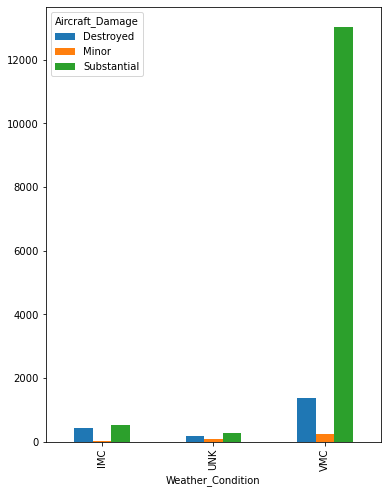

In [4]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.plot(kind='bar', figsize=(6,8),use_index = True)

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

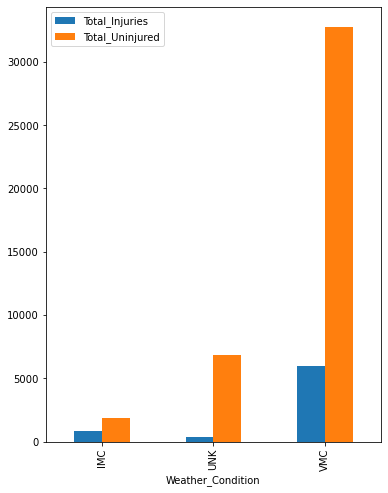

In [5]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

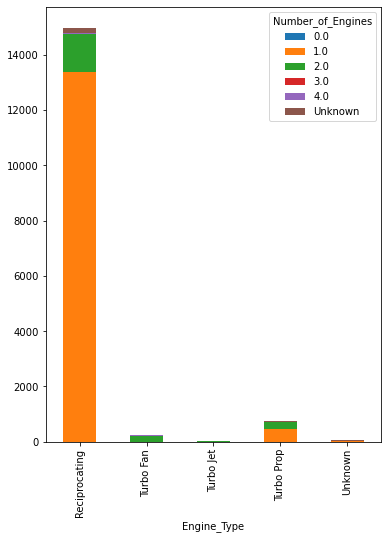

In [6]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

In [7]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

make_df['Injury_Rate'] = (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-7-aec84bc5b530>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])


Injury_Rate                               
Engine_Type        Reciprocating Turbo Fan   Unknown Turbo Prop
Make                                                           
Cessna                  0.198546   0.00000  0.000000   0.147513
Piper                   0.202326   0.00000  0.000000   0.000000
Boeing                  0.222222   0.03042  0.228139   0.000000
Beech                   0.194618   0.00000  0.000000   0.087896
Mooney                  0.250364   0.00000  0.000000   0.000000
Grumman                 0.305195   0.00000  0.000000   0.000000
Aeronca                 0.287540   0.00000  0.000000   0.000000
Bellanca                0.208437   0.00000  0.000000   0.000000
Cirrus design corp      0.217033   0.00000  0.000000   0.000000
Stinson                 0.301653   0.00000  0.000000   0.000000
Luscombe                0.316279   0.00000  0.000000   0.000000
Air tractor             0.000000   0.00000  0.000000   0.222591
Champion                0.242915   0.00000  0.000000   0.000000
Taylorcraft             0.327044   0.00000  0.000000   0.000000
Maule                   0.136111   0.00000  0.000000   0.000000
Cirrus                  0.214286   0.00000  0.000000   0.000000

In [8]:
(df['Engine_Type'].value_counts(normalize=True) * 100).to_frame()

,Engine_Type
Reciprocating,93.074964
Turbo Prop,4.595988
Turbo Fan,1.621017
Unknown,0.490653
Turbo Jet,0.217378


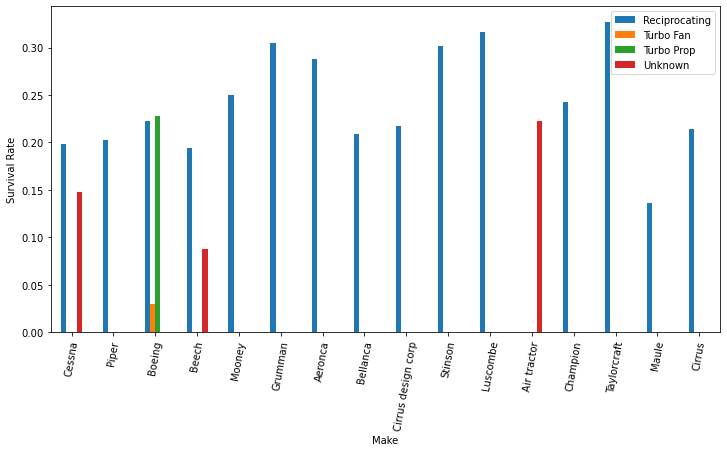

In [9]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Prop',
'Unknown'])
ax.set_ylabel('Survival Rate');

In [10]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model               Engine_Type  
Cessna 172               Reciprocating    739
Cessna 152               Reciprocating    412
Cessna 172N              Reciprocating    298
Cessna 182               Reciprocating    285
Cessna 172S              Reciprocating    253
Cessna 180               Reciprocating    227
Piper PA28               Reciprocating    222
Cessna 150               Reciprocating    216
Piper PA-28-140          Reciprocating    200
Cessna 172M              Reciprocating    198
Piper PA-18-150          Reciprocating    188
Cessna 172P              Reciprocating    157
Beech A36                Reciprocating    148
Piper PA-28-161          Reciprocating    132
Cessna 140               Reciprocating    120
Piper PA-28-180          Reciprocating    120
Cirrus design corp SR22  Reciprocating    118
Cessna 170B              Reciprocating    116
Piper PA-28-181          Reciprocating    106
Piper PA-18              Reciprocating    104
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [11]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make', 'Total_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

model_df['Injury_Rate'] = (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df.sort_values(by=['Injury_Rate'], ascending=True, inplace=True)
model_df

<ipython-input-11-d0ed60ac96ce>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Injury_Rate
Make_Model,
Boeing 737,0.040179
Boeing 767,0.052907
Cessna 180,0.135266
Cessna 152,0.152057
Cessna 172P,0.191176
Cessna 172N,0.194296
Cessna 172,0.196333
Cirrus design corp SR22,0.207627
Cessna 182,0.218430


In [12]:
def find_bins_index(bin_list, value):
    for index in range(len(bin_list) - 1):
        if bin_list[index] <= value < bin_list[index + 1]:
            break
    
    return index
        

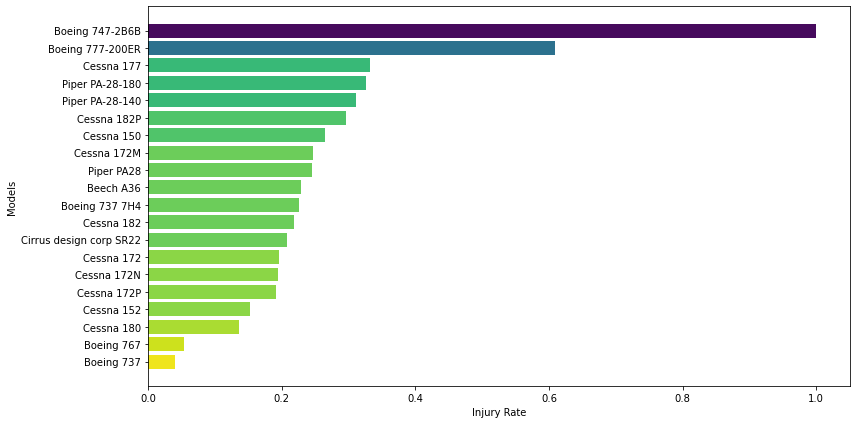

In [13]:
fig, ax = plt.subplots(figsize=(12,6))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0, 1, len(model_df) + 1)

colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

for index, (make, row) in enumerate(model_df.iterrows()):
    idx = find_bins_index(bin_edges, row['Injury_Rate'])
    color = colors[idx]
    ax.barh(make, row['Injury_Rate'], color = color)

ax.set_ylabel('Models')
ax.set_xlabel('Injury Rate')
plt.tight_layout()
plt.savefig('./Figures/Models_Injury_Rate',dpi = 120)

In [14]:
top_20 = df['Make'].value_counts()
Make_Rates = df[df['Make'].isin(top_20.index)][['Make', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Make_Rates = df.groupby(['Make'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])
Make_Rates['Injury_Rate'] = Make_Rates['Total_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Fatality_Rate'] = Make_Rates['Total_Fatal_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Survival_Rate'] = 1- Make_Rates['Injury_Rate'] - Make_Rates['Fatality_Rate']
Make_Rates

Make_damage_list = df[df['Make'].isin(top_20.index)][['Make', 'Aircraft_Damage']]
Make_damage_df = Make_damage_list.groupby(['Make','Aircraft_Damage']).size().to_frame(None)
Make_damage_sum = Make_damage_df.groupby(level='Make').sum()

Make_normalized_damage_df = Make_damage_df.div(Make_damage_sum, level='Make')
Make_normalized_damage_df = Make_normalized_damage_df.unstack(level=1, fill_value = 0)
Make_normalized_damage_df

Make_safety_score_df = Make_Rates.merge(Make_normalized_damage_df, left_index=True, right_index=True);

Make_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Make_safety_score_df.drop(Make_safety_score_df.columns[0:3],axis =1,inplace= True)

Make_safety_score_df['Safety_Score'] = (
    10 * Make_safety_score_df['Fatality_Rate'] + 30 * Make_safety_score_df['Injury_Rate'] +  60 * Make_safety_score_df['Survival_Rate'] +
    10 * Make_safety_score_df['Destroyed_Rate'] + 30 * Make_safety_score_df['Substantial_Rate']+ 60 * Make_safety_score_df['Minor_Rate'])

Make_safety_score_df.sort_values(by=['Safety_Score'], ascending=True,inplace=True)
Make_safety_score_df.to_csv('./Export_csvs/Model_Safety_Score.csv', index=True)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


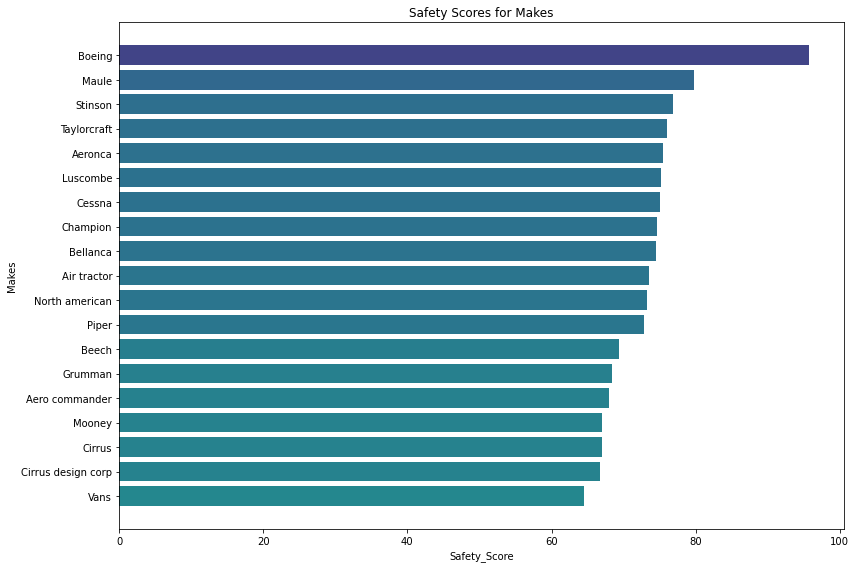

In [15]:
fig, ax = plt.subplots(figsize=(12,8))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0, 120, 200)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(199)]
safety_scores = Make_safety_score_df['Safety_Score']
# bin_indices = np.digitize(safety_scores, bin_edges) - 1 

# for index, (make, row) in enumerate(Model_safety_score_df.iterrows()):
#     safety_score = row['Safety_Score']
#     color = colors[bin_indices[idx]]
#     ax.barh(make, safety_score, color=color)

normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

for idx, (make, row) in enumerate(Make_safety_score_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Safety Scores for Makes')
ax.set_ylabel('Makes')
ax.set_xlabel('Safety_Score')

plt.tight_layout()
plt.savefig('./Figures/Makes_Safety_Scores',dpi = 120)

safety score

I = injury rate
F = fatality rate
D = damage
    Destroyed - 3
    Substantial - 2
    Minor - 1



In [16]:
top_20 = df['Make_Model'].value_counts()[lambda x : x > 50][:10]

Model_Rates = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Model_Rates = Model_Rates.groupby(['Make_Model'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

Model_Rates['Injury_Rate'] = Model_Rates['Total_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Fatality_Rate'] = Model_Rates['Total_Fatal_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Survival_Rate'] = 1- Model_Rates['Injury_Rate'] - Model_Rates['Fatality_Rate']
Model_Rates

Model_damage_list = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Aircraft_Damage']]
Model_damage_df = Model_damage_list.groupby(['Make_Model','Aircraft_Damage']).size().to_frame(None)
Model_damage_sum = Model_damage_df.groupby(level='Make_Model').sum()

Model_normalized_damage_df = Model_damage_df.div(Model_damage_sum, level='Make_Model')
Model_normalized_damage_df = Model_normalized_damage_df.unstack(level=1, fill_value = 0)
Model_normalized_damage_df

Model_safety_score_df = Model_Rates.merge(Model_normalized_damage_df, left_index=True, right_index=True);

Model_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Model_safety_score_df.drop(Model_safety_score_df.columns[0:3],axis =1,inplace= True)

Model_safety_score_df['Safety_Score'] = (
    10 * Model_safety_score_df['Fatality_Rate'] + 30 * Model_safety_score_df['Injury_Rate'] +  60 * Model_safety_score_df['Survival_Rate'] +
    10 * Model_safety_score_df['Destroyed_Rate'] + 30 * Model_safety_score_df['Substantial_Rate']+ 60 * Model_safety_score_df['Minor_Rate'])

Model_safety_score_df.sort_values(by=['Safety_Score'], ascending=True, inplace=True)
Model_safety_score_df

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Injury_Rate,Fatality_Rate,Survival_Rate,Destroyed_Rate,Minor_Rate,Substantial_Rate,Safety_Score
Make_Model,,,,,,,
Piper PA-28-140,0.310526,0.181579,0.507895,0.134328,0.014925,0.850746,69.366457
Piper PA28,0.245658,0.181141,0.573201,0.108108,0.009009,0.882883,71.681309
Cessna 150,0.264706,0.133987,0.601307,0.152778,0.000000,0.847222,72.303922
Cessna 172M,0.246537,0.152355,0.601108,0.120603,0.000000,0.879397,72.574089
Cessna 182,0.218430,0.168942,0.612628,0.140351,0.014035,0.845614,72.614035
Cessna 172N,0.194296,0.178253,0.627451,0.114094,0.003356,0.882550,73.077259
Cessna 172,0.196333,0.104660,0.699007,0.073072,0.004060,0.922869,77.537357
Cessna 152,0.152057,0.082290,0.765653,0.099515,0.014563,0.885922,79.770394
Cessna 172S,0.126984,0.097884,0.775132,0.043478,0.007905,0.948617,80.663885


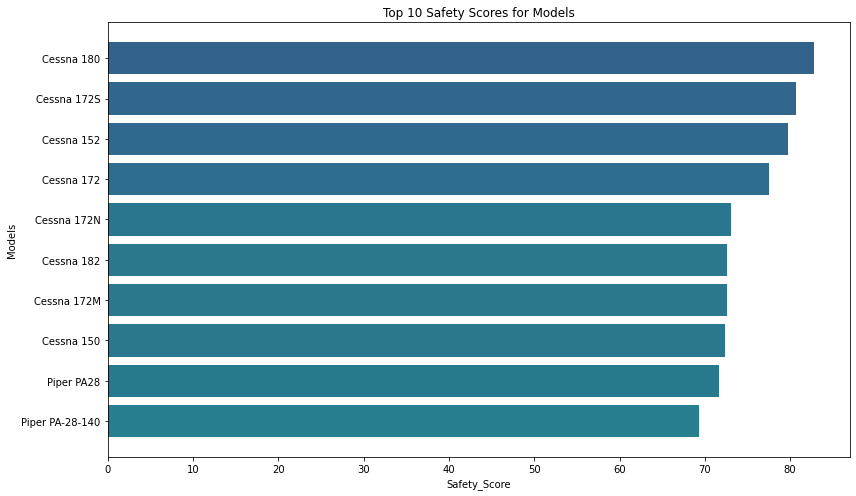

In [17]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0, 120, 200)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(199)]
safety_scores = Model_safety_score_df['Safety_Score']
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

for idx, (make, row) in enumerate(Model_safety_score_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Top 10 Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety_Score')

plt.tight_layout()
plt.savefig('./Figures/Top_10_Models_Safety_Scores',dpi = 120)

In [21]:
top_20 = df['Make_Model'].value_counts()[lambda x : x > 50]

Model_Rates = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Model_Rates = Model_Rates.groupby(['Make_Model'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

Model_Rates['Injury_Rate'] = Model_Rates['Total_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Fatality_Rate'] = Model_Rates['Total_Fatal_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Survival_Rate'] = 1- Model_Rates['Injury_Rate'] - Model_Rates['Fatality_Rate']
Model_Rates

Model_damage_list = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Aircraft_Damage']]
Model_damage_df = Model_damage_list.groupby(['Make_Model','Aircraft_Damage']).size().to_frame(None)
Model_damage_sum = Model_damage_df.groupby(level='Make_Model').sum()

Model_normalized_damage_df = Model_damage_df.div(Model_damage_sum, level='Make_Model')
Model_normalized_damage_df = Model_normalized_damage_df.unstack(level=1, fill_value = 0)
Model_normalized_damage_df

Model_safety_score_df = Model_Rates.merge(Model_normalized_damage_df, left_index=True, right_index=True);

Model_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Model_safety_score_df.drop(Model_safety_score_df.columns[0:3],axis =1,inplace= True)

Model_safety_score_df['Safety_Score'] = (
    10 * Model_safety_score_df['Fatality_Rate'] + 30 * Model_safety_score_df['Injury_Rate'] +  60 * Model_safety_score_df['Survival_Rate'] +
    10 * Model_safety_score_df['Destroyed_Rate'] + 30 * Model_safety_score_df['Substantial_Rate']+ 60 * Model_safety_score_df['Minor_Rate'])

Model_safety_score_df.sort_values(by=['Safety_Score'], ascending=True, inplace=True)
Model_safety_score_df

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Injury_Rate,Fatality_Rate,Survival_Rate,Destroyed_Rate,Minor_Rate,Substantial_Rate,Safety_Score
Make_Model,,,,,,,
Mooney M20C,0.448980,0.275510,0.275510,0.232143,0.000000,0.767857,58.112245
Beech A36,0.228986,0.336232,0.434783,0.230263,0.000000,0.769737,61.713577
Cirrus design corp SR22,0.207627,0.317797,0.474576,0.169492,0.050847,0.779661,66.016949
Piper PA-28-140,0.310526,0.181579,0.507895,0.134328,0.014925,0.850746,69.366457
Piper PA-28-180,0.326271,0.144068,0.529661,0.100000,0.000000,0.900000,71.008475
Piper PA28,0.245658,0.181141,0.573201,0.108108,0.009009,0.882883,71.681309
Cessna 150,0.264706,0.133987,0.601307,0.152778,0.000000,0.847222,72.303922
Cessna 172M,0.246537,0.152355,0.601108,0.120603,0.000000,0.879397,72.574089
Cessna 182,0.218430,0.168942,0.612628,0.140351,0.014035,0.845614,72.614035


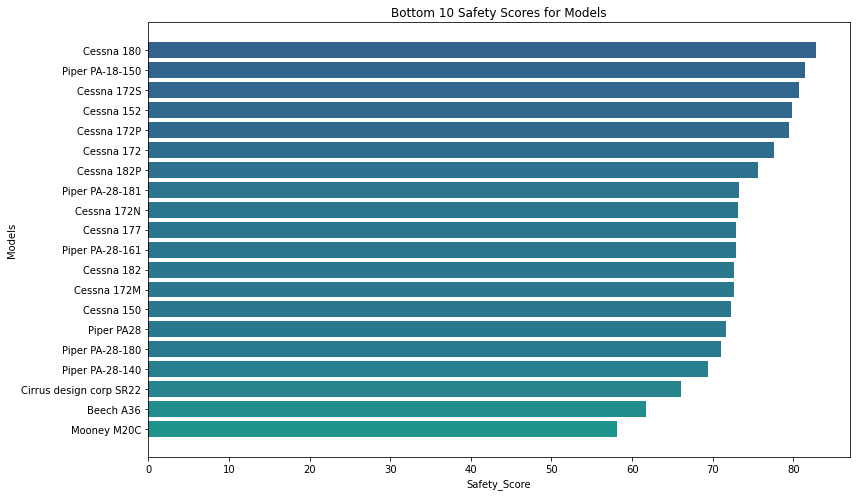

In [22]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0, 120, 200)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(199)]
safety_scores = Model_safety_score_df['Safety_Score']
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

for idx, (make, row) in enumerate(Model_safety_score_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Bottom 10 Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety_Score')

plt.tight_layout()
plt.savefig('./Figures/Bottom_10_Models_Safety_Scores',dpi = 120)

In [ ]:
top_20 = df['Make_Model'].value_counts()

Model_Rates = 

In [25]:
df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]

,Make_Model,Total_Fatal_Injuries,Total_Injuries,Total_Passengers,Aircraft_Damage
0,Cessna 140,0.0,0.0,2.0,Substantial
1,Cessna 401B,0.0,0.0,2.0,Substantial
2,Bellanca 17-30A,0.0,1.0,1.0,Destroyed
3,Cessna R172K,1.0,0.0,1.0,Destroyed
4,Beech 19,2.0,0.0,2.0,Destroyed
...,...,...,...,...,...
16096,Cessna L-19E,0.0,0.0,1.0,Substantial
16097,Cessna 150,0.0,0.0,1.0,Substantial
16098,Cessna 177RG,0.0,0.0,2.0,Substantial
16099,Beech B-60,0.0,0.0,1.0,Substantial


In [23]:
Model_Rates = Model_Rates.groupby(['Make_Model'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

Model_Rates['Injury_Rate'] = Model_Rates['Total_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Fatality_Rate'] = Model_Rates['Total_Fatal_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Survival_Rate'] = 1- Model_Rates['Injury_Rate'] - Model_Rates['Fatality_Rate']
Model_Rates

Model_damage_list = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Aircraft_Damage']]
Model_damage_df = Model_damage_list.groupby(['Make_Model','Aircraft_Damage']).size().to_frame(None)
Model_damage_sum = Model_damage_df.groupby(level='Make_Model').sum()

Model_normalized_damage_df = Model_damage_df.div(Model_damage_sum, level='Make_Model')
Model_normalized_damage_df = Model_normalized_damage_df.unstack(level=1, fill_value = 0)
Model_normalized_damage_df

Model_safety_score_df = Model_Rates.merge(Model_normalized_damage_df, left_index=True, right_index=True);

Model_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Model_safety_score_df.drop(Model_safety_score_df.columns[0:3],axis =1,inplace= True)

Model_safety_score_df['Safety_Score'] = (
    10 * Model_safety_score_df['Fatality_Rate'] + 30 * Model_safety_score_df['Injury_Rate'] +  60 * Model_safety_score_df['Survival_Rate'] +
    10 * Model_safety_score_df['Destroyed_Rate'] + 30 * Model_safety_score_df['Substantial_Rate']+ 60 * Model_safety_score_df['Minor_Rate'])

Model_safety_score_df.sort_values(by=['Safety_Score'], ascending=True, inplace=True)
Model_safety_score_df

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Injury_Rate,Fatality_Rate,Survival_Rate,Destroyed_Rate,Minor_Rate,Substantial_Rate,Safety_Score
Make_Model,,,,,,,
Boeing 777-200ER,0.609121,0.009772,0.381107,1.000000,0.000000,0.000000,51.237785
Beech A36,0.228986,0.336232,0.434783,0.230263,0.000000,0.769737,61.713577
Cirrus design corp SR22,0.207627,0.317797,0.474576,0.169492,0.050847,0.779661,66.016949
Piper PA-28-140,0.310526,0.181579,0.507895,0.134328,0.014925,0.850746,69.366457
Piper PA-28-180,0.326271,0.144068,0.529661,0.100000,0.000000,0.900000,71.008475
Piper PA28,0.245658,0.181141,0.573201,0.108108,0.009009,0.882883,71.681309
Cessna 150,0.264706,0.133987,0.601307,0.152778,0.000000,0.847222,72.303922
Cessna 172M,0.246537,0.152355,0.601108,0.120603,0.000000,0.879397,72.574089
Cessna 182,0.218430,0.168942,0.612628,0.140351,0.014035,0.845614,72.614035


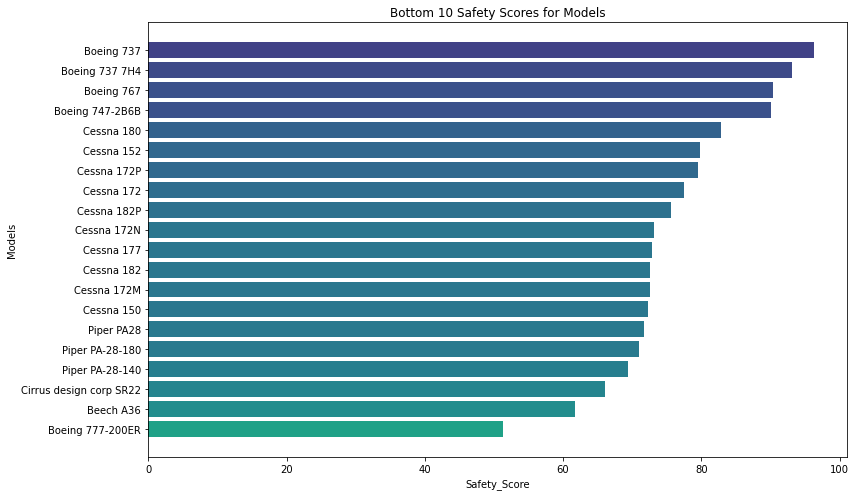

In [24]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0, 120, 200)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(199)]
safety_scores = Model_safety_score_df['Safety_Score']
normalized_scores = (safety_scores - min(bin_edges)) / (max(bin_edges) - min(bin_edges))

for idx, (make, row) in enumerate(Model_safety_score_df.iterrows()):
    normalized_score = normalized_scores[idx]
    color = color_map(normalized_score)
    ax.barh(make, row['Safety_Score'], color=color)
    
ax.set_title('Bottom 10 Safety Scores for Models')
ax.set_ylabel('Models')
ax.set_xlabel('Safety_Score')

plt.tight_layout()